<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Backpropagation" data-toc-modified-id="Backpropagation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Backpropagation</a></span></li><li><span><a href="#FeedForward" data-toc-modified-id="FeedForward-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>FeedForward</a></span></li><li><span><a href="#mnist-예제" data-toc-modified-id="mnist-예제-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>mnist 예제</a></span><ul class="toc-item"><li><span><a href="#batch-size" data-toc-modified-id="batch-size-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>batch size</a></span></li></ul></li><li><span><a href="#Tensor" data-toc-modified-id="Tensor-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Tensor</a></span></li><li><span><a href="#funtional-paradigm" data-toc-modified-id="funtional-paradigm-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>funtional paradigm</a></span></li><li><span><a href="#Transfer-Learning" data-toc-modified-id="Transfer-Learning-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Transfer Learning</a></span></li></ul></div>


# [AI 오픈 이노베이션] 기본 저녁반<a class="tocSkip">
GitHub link: [https://github.com/realblack0/ai_lecture_fundamental](https://github.com/realblack0/ai_lecture_fundamental)  
E-Mail: realblack0@gmail.com

## Backpropagation

- 딥러닝의 학습기법
- Loss function을 모델의 파라미터에 관하여 편미분하여 기울기를 구한다. → 기울기는 Gradient Descent 알고리즘에 사용된다.
- chain rule을 적용하여 기울기를 계산하는 방법을 Jeoffrey Hiton(제프리 힌튼)이 고안하였다.
- 모델의 레이어가 깊어지면 입력으로부터 예측까지의 계산이 복잡해져서 파라미터가 예측 결과에 어떤 영향을 주는지 이해할 수 없어진다. 즉, 모델을 어떻게 학습시킬지 알 수 없었다. 이로 인해 AI의 겨울 도래하였는데, Backpropagation이 등장함으로써 다시 AI가 부흥기를 맞이하였다.
- 추천 유튜브 영상: 모두를 위한 딥러닝 [lec9-2: 딥넷트웍 학습 시키기 (backpropagation)](https://youtu.be/573EZkzfnZ0) (18:27)

## FeedForward

- 학습 기법이 아님
- 딥러닝이 예측하는 방식이다.

모델의 예측 결과가 계산되는 과정을 보면, 데이터가 input layer로 들어와서 hidden layer들을 거쳐서 output layer의 방향으로 전진한다. 데이터의 흐름이 앞으로 계속 나아간다고 해서 feed forward라는 이름이 붙었다.  
  
예측값은 output layer에서 나온다. Loss function은 예측값과 실제값의 차이(오차) 이다.  chain rule을 적용하여 loss를 미분하는 과정은 output(뒤쪽)으로부터 input(앞쪽)의 방향으로 계산된다. 오차(loss)를 반대 방향으로 전파한다고 해서 backpropagation이라는 이름이 붙었다.

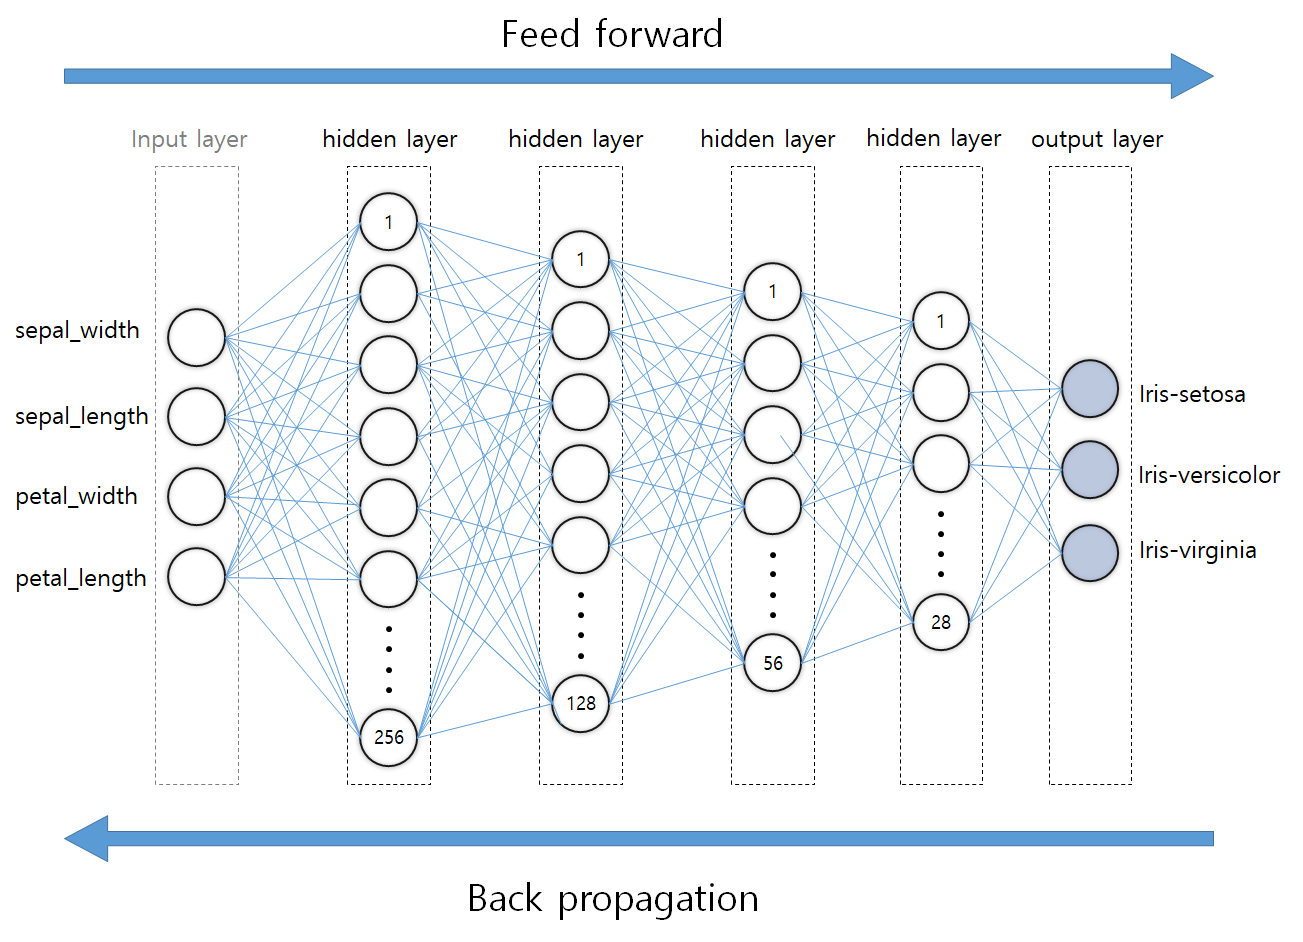

## mnist 예제

In [9]:
from tensorflow.keras.datasets import mnist

In [10]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [11]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

- iris는 데이터 150개, feature 4개
    - 데이터의 양이 적어서 cross validation 했었다.
- mnist는 데이터 70000개, feature 748개
    - 충분히 많아서 바로 hold out한다.
    - 28x28 이미지를 flatten 했을때 길이가 748

In [31]:
import matplotlib.pyplot as plt

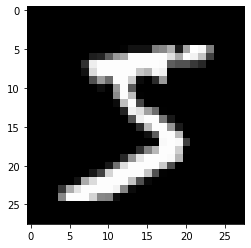

In [32]:
plt.imshow(X_train[0], cmap="gray")

In [33]:
# MinMaxScaling
X_train, X_test = X_train / 255., X_test / 255.

Keras에서 모델 만드는 3가지 방법
1. Sequential
2. Model : functional Paradigm
3. Model : class inheritance

Model과 Sequential의 차이점
- Model
    - 기본적으로 functional paradigm으로 사용함
    - 전문가들은 상속해서 만든다.
- Sequential
    - 초보자용

In [24]:
from tensorflow.keras.models import Sequential, Model

이론과 일치하는 layer도 있지만, 이론에는 없으나 사용자 편의성을 위한 layer도 있다.
- 이론 layer : `Dense`
- 이론에 없는 layer: `Flatten`

In [25]:
from tensorflow.keras.layers import Dense, Flatten

In [26]:
model = Sequential([
    Flatten(input_shape=(28,28)),   # 첫번째 레이어에는 input_shape 써야함
    Dense(16, activation="relu"),   # hidden layer 수와 노드 수는 하이퍼 파라미터
    Dense(10, activation="softmax") # 맨 끝에 있는 layer는 문제에 따라서 node 개수 맞춰줘야함
                                    # binary(이진) 분류할 때는 sigmoid
                                    # multi classifiation은 soft max 
])

binary classification이라고 꼭 sigmoid를 써야하는 것은 아니다.    
마지막 레이어의 활성함수로 sigmoid, softmax를 꼭 써야하는 건 아니다.  
하지만 쓰면 결과를 이해하기가 쉽다.

In [27]:
# sigmoid로 binary 분류할 때
binary_model_sigmoid = Sequential([
                    Flatten(input_shape=(28,28)),  
                    Dense(16, activation="relu"),  
                    Dense(1, activation="sigmoid")   # output layer node 1  
                ])

In [28]:
# softmax로 binary 분류할 때
binary_model_softmax = Sequential([
                    Flatten(input_shape=(28,28)),  
                    Dense(16, activation="relu"),  
                    Dense(2, activation="softmax")   # output layer node 2
                ])

In [29]:
# regression 문제일 때
regression_model = Sequential([
                    Flatten(input_shape=(28,28)),  
                    Dense(16, activation="relu"),  
                    Dense(1)    # no activation
                ])

In [30]:
# classification할 때 activation 안 써도 되긴 하다.
binary_model_no_act = Sequential([
                    Flatten(input_shape=(28,28)),  
                    Dense(16, activation="relu"),  
                    Dense(2)    
])

parameter를 update할 때 고려해야할 사항으로는 방향과 보폭이 있다.  
adam은 2개 다 고려한다. 일반적으로 optiomizer에 adam을 쓰면 성능이 좋은 편이다.  
  
target이 label encoding되어 있으면 sparse_를 붙인 sparse_categorical_crossentropy를 사용한다.

In [31]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["acc"])

In [32]:
model.fit(X_train, y_train, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 65us/sample - loss: 2.3540 - acc: 0.2975
Epoch 2/10
60000/60000 [==============================] - 3s 52us/sample - loss: 1.3448 - acc: 0.4834
Epoch 3/10
60000/60000 [==============================] - 3s 51us/sample - loss: 1.0002 - acc: 0.6269
Epoch 4/10
60000/60000 [==============================] - 3s 52us/sample - loss: 0.8529 - acc: 0.6792
Epoch 5/10
60000/60000 [==============================] - 3s 51us/sample - loss: 0.7576 - acc: 0.7285
Epoch 6/10
60000/60000 [==============================] - 3s 51us/sample - loss: 0.6686 - acc: 0.7674
Epoch 7/10
60000/60000 [==============================] - 3s 50us/sample - loss: 0.6255 - acc: 0.7781
Epoch 8/10
60000/60000 [==============================] - 3s 51us/sample - loss: 0.5994 - acc: 0.7875
Epoch 9/10
60000/60000 [==============================] - 3s 50us/sample - loss: 0.5914 - acc: 0.7914
Epoch 10/10
60000/60000 [==============================] - 

### batch size  

batch는 데이터 묶음이다. batch 1개당 loss를 1번 구한다. loss 1번당 parameter를 1번 update한다.  
batch size는 모델에 전달할 데이터의 양을 일컫는다.  
  
batch size가 클수록
- 연산량 많아진다. (메모리를 많이 사용한다.) 
- 학습이 잘 된다. (loss 수렴이 안정적이다.)
- 학습이 오래걸린다. (parameter update 횟수가 적어진다.)
  
batsh size가 작을수록
- 연산량이 적다. (메모리 효율적이다.)
- 학습이 비교적 불안정하다. (loss가 들쭉날쭉하다.)
- 학습이 빨리된다. (parameter update 획수가 많다.)

※ 참고: epoch은 모든 데이터가 다 모델을 한번 거치는 과정을 일컫는다.  

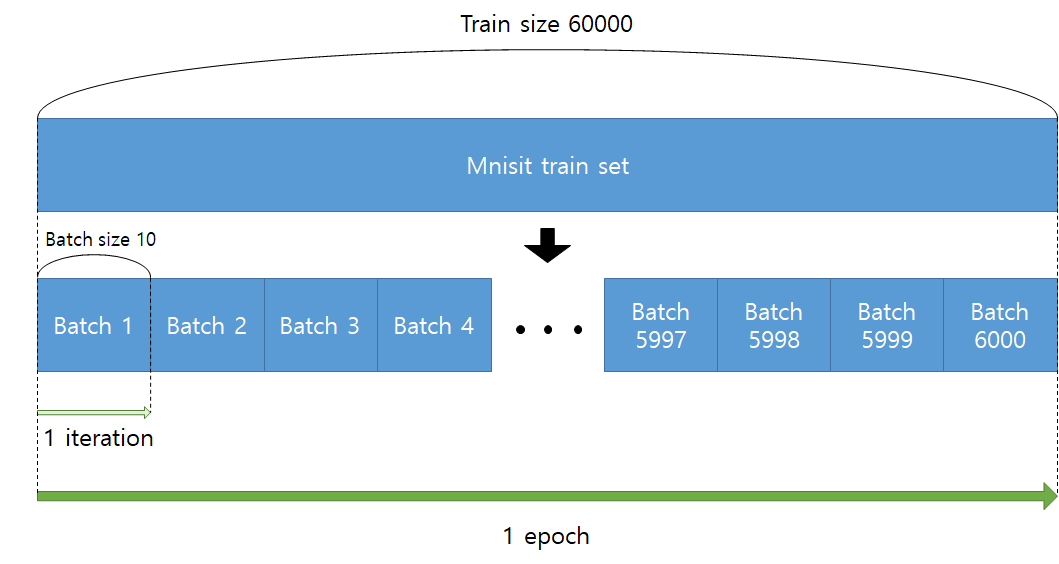

학습했던 모델에 또 fit하면 연달아서 학습하므로, 모델 새로 만든다.

In [41]:
model = Sequential([
    Flatten(input_shape=(28,28)),  
    Dense(16, activation="relu"),  
    Dense(10, activation="softmax")
])

In [42]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["acc"])

batch_size를 바꿨다.  
데이터 10개씩 묶어서 loss를 계산하고 parameter를 조정한다.  
X_train은 60000개 이므로, batch가 6000개 생긴다.  
batch 6000개를 모두 사용하면 1 epoch이 된다. 다시 말하면 1 epoch 당 parameter update가 6000번 일어난다. 
`epochs=10`이므로 이 과정을 10번 반복한다. 

In [44]:
model.fit(X_train, y_train, epochs=10, batch_size=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 16s 273us/sample - loss: 0.3600 - acc: 0.8976
Epoch 2/10
60000/60000 [==============================] - 13s 221us/sample - loss: 0.2302 - acc: 0.9339
Epoch 3/10
60000/60000 [==============================] - 15s 247us/sample - loss: 0.1983 - acc: 0.9412
Epoch 4/10
60000/60000 [==============================] - 16s 271us/sample - loss: 0.1799 - acc: 0.9474
Epoch 5/10
60000/60000 [==============================] - 20s 327us/sample - loss: 0.1676 - acc: 0.9512
Epoch 6/10
60000/60000 [==============================] - 15s 257us/sample - loss: 0.1589 - acc: 0.9527
Epoch 7/10
60000/60000 [==============================] - 14s 238us/sample - loss: 0.1522 - acc: 0.9554
Epoch 8/10
60000/60000 [==============================] - 16s 264us/sample - loss: 0.1461 - acc: 0.9565
Epoch 9/10
60000/60000 [==============================] - 19s 318us/sample - loss: 0.1409 - acc: 0.9576
Epoch 10/10
60000/60000 [================

모델이 한번도 보지 않은 데이터로 성능을 평가한다.

In [34]:
model.evaluate(X_test, y_test, verbose=2)

10000/1 - 0s - loss: 0.4132 - acc: 0.8009


[0.5986016908168793, 0.8009]

성능 테스트가 끝이 아니다.  
가지고 있는 데이터를 모두 써서 학습해야 최종 모델이 만들어진다.  
test set을 바로 학습에 쓸 수 있다. train set과 shape이 같기 때문이다. 

In [49]:
model.fit(X_test, y_test)

Train on 10000 samples
10000/10000 [==============================] - 1s 89us/sample - loss: 0.1661 - acc: 0.9535


데이터를 하나만 뽑아서 예측하려고 하면 에러가 발생한다.
shape이 안 맞기 때문이다.

In [ ]:
# Error
model.predict(X_test[0])

차원 늘려서 shape 맞추면 예측 가능하다.  
numpy에서 차원을 늘리는 방법은 여러가지 있었다.

In [46]:
import numpy as np

In [35]:
model.predict(X_test[0][np.newaxis])

array([[4.7071849e-09, 5.0418125e-06, 1.6303343e-06, 9.4447221e-04,
        2.4889921e-08, 3.4296521e-05, 5.7791639e-18, 9.8523605e-01,
        4.4105254e-06, 1.3773931e-02]], dtype=float32)

마지막 레이어에 활성함수가 없어도 상관은 없는데 해석하기 어렵다.

In [36]:
model = Sequential([
    Flatten(input_shape=(28,28)),  
    Dense(16, activation="relu"),  
    Dense(10)
])

In [37]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["acc"])

In [38]:
model.fit(X_train, y_train, epochs=10, batch_size=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 159us/sample - loss: 3.3857 - acc: 0.2094
Epoch 2/10
60000/60000 [==============================] - 9s 153us/sample - loss: 2.3059 - acc: 0.1405
Epoch 3/10
60000/60000 [==============================] - 9s 153us/sample - loss: 2.3028 - acc: 0.1243
Epoch 4/10
60000/60000 [==============================] - 9s 155us/sample - loss: 2.3028 - acc: 0.1244
Epoch 5/10
60000/60000 [==============================] - 9s 153us/sample - loss: 2.3028 - acc: 0.1245
Epoch 6/10
60000/60000 [==============================] - 9s 154us/sample - loss: 2.3028 - acc: 0.1245
Epoch 7/10
60000/60000 [==============================] - 9s 151us/sample - loss: 2.3028 - acc: 0.1245
Epoch 8/10
60000/60000 [==============================] - 9s 154us/sample - loss: 2.3028 - acc: 0.1245
Epoch 9/10
60000/60000 [==============================] - 10s 175us/sample - loss: 2.3028 - acc: 0.1245
Epoch 10/10
60000/60000 [=======================

예측은 feed forward한다. input data와 학습된 parameter를 연산만 한다.  
softmax를 쓰면 모든 출력을 더해서 1이 되었다. 예측 결과를 확률이라고 생각하면 해석하기가 편했다.  
sotfmax를 안 써도 학습하고 예측하는데는 무리가 없지만, 결과가 바로 이해되지는 않는다.

In [39]:
model.predict(np.expand_dims(X_test[2], 0))

array([[-277.79324, -344.12595, -196.16412, -458.36932, -168.22406,
        -243.29274, -379.71594, -241.98096, -420.49963, -257.84952]],
      dtype=float32)

`argmax`로 array의 원소 중에서 가장 큰 값의 인덱스를 찾을 수 있다.  
이 인덱스가 곧 class 번화이다.

In [40]:
np.argmax(model.predict(np.expand_dims(X_test[2], 0))) # 인덱스 번호가 4 → 숫자 5로 예측했음

4

**최근 딥러닝 수업 방식 3가지** 
- 이론
- numpy, tensor 가지고 처음부터
- Tensorflow/Keras, Pytorch 사용법

## Tensor

※ 수업에서 참고한 Tensorflow 공식 튜토리얼: [텐서플로 텐서](https://www.tensorflow.org/guide/tensor?hl=ko)

Tensor는 Tensorflow에서 사용하는 기본 자료형이다.  
TensorFlow는 tensor가 neural network를 따라 흐른다고 해서 이름지어졌다. 

텐서(Tensor)라는 이름은 원래 수학에서 나온 용어이다.  
※ 랭크(rank)는 차원을 의미한다.

|랭크|	수학| 개체|
|---|---|---|
|0	|스칼라(Scalar)| (크기(magnitude)만)|
|1	|벡터(Vector)| (크기와 방향(direction))|
|2	|행렬(Matrix)| (숫자 표)|
|3	|3-텐서| (숫자 큐브(cube))|
|n	|n-텐서| (알 수 있을겁니다(you get the idea))|

Tensorlfow는 Numpy를 기반으로 만들었다.  

Numpy와 Tensor는 다음과 같은 차이가 있다.

|Numpy|Tensor|
|---  |---   |
|GPU 지원 안함| GPU 지원|
|비체계적인 부분이 좀 있음|numpy의 비체계적인 부분을 수정해서 코딩 효율성 높임|
|범용적|뉴럴 네트워크에 관련된 기능만 지원|

tensor를 만드는 방법은 numpy에서 값을 만드는 방법과 비슷하다.

In [42]:
import tensorflow as tf

In [43]:
import numpy as np

In [44]:
a = np.array([1,2,3])

In [45]:
# constant = 변하지 않는 값 
# tensorflow는 상수 개념을 지원한다.
# 그러나 파이썬 언어 자체는 상수를 지원 안한다. → 모든 건 재할당할 때 바뀜

b = tf.constant([1,2,3])

tensor를 보면 numpy가 있다.

In [46]:
b

<tf.Tensor: id=240462, shape=(3,), dtype=int32, numpy=array([1, 2, 3])>

tensor를 numpy처럼 사용 가능하다.

In [47]:
# element-wise operation (원소별 연산)
b + b 

<tf.Tensor: id=240463, shape=(3,), dtype=int32, numpy=array([2, 4, 6])>

In [48]:
# broadcasting
b * 3

<tf.Tensor: id=240465, shape=(3,), dtype=int32, numpy=array([3, 6, 9])>

tensor의 내부구조는 numpy활용하였다. `numpy` 메소드는 tensor를 numpy 포맷으로 바꿔준다.

In [49]:
b.numpy()

array([1, 2, 3])

numpy의 기능 그대로 쓸 수 있다.

In [50]:
b.shape

TensorShape([3])

In [51]:
b.dtype

tf.int32

In [54]:
# 2차원
b = tf.constant([[1], [2], [3]])

In [72]:
b

<tf.Tensor: id=425724, shape=(3, 1), dtype=int32, numpy=
array([[1],
       [2],
       [3]])>

In [69]:
b.shape

TensorShape([3, 1])

In [70]:
b.dtype

tf.int32

sequence처럼 슬라이싱과 인덱싱 가능하다.

In [73]:
# indexing
b[0]

<tf.Tensor: id=425728, shape=(1,), dtype=int32, numpy=array([1])>

In [ ]:
# slicing
b[:, 0]

값을 만들 때 zeros, ones, eye, empty 등 numpy처럼 만들 수 있다.

In [56]:
tf.zeros((3, 3))

<tf.Tensor: id=240474, shape=(3, 3), dtype=float32, numpy=
array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]], dtype=float32)>

In [57]:
tf.ones((3, 3))

<tf.Tensor: id=240477, shape=(3, 3), dtype=float32, numpy=
array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]], dtype=float32)>

In [58]:
tf.eye(3)

<tf.Tensor: id=240481, shape=(3, 3), dtype=float32, numpy=
array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)>

In [59]:
# full 아니고 fill
tf.fill((3, 3), 3)

<tf.Tensor: id=240484, shape=(3, 3), dtype=int32, numpy=
array([[3, 3, 3],
       [3, 3, 3],
       [3, 3, 3]])>

In [62]:
# empty
tf.raw_ops.Empty(shape=(3, 3), dtype="float32")

<tf.Tensor: id=240486, shape=(3, 3), dtype=float32, numpy=
array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]], dtype=float32)>

reshape은 함수를 이용한다.

In [65]:
c = tf.range(25)

In [69]:
c

<tf.Tensor: id=240490, shape=(25,), dtype=int32, numpy=
array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24])>

In [68]:
tf.reshape(c, (5, 5))

<tf.Tensor: id=240494, shape=(5, 5), dtype=int32, numpy=
array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])>

tensorflow 2.x 버전부터는 eager 모드를 지원한다.

In [71]:
# eager tensor 아니면 1버전
type(b)

tensorflow.python.framework.ops.EagerTensor

tensorflow 1.x 버전은 내부적으로 compile 방식을 썼다.  
내부 구조상 1.x 버전이 더 빠르다.  
하지만 compile 언어의 특성상 다 실행되기 전에는 중간 결과를 확인할 수 없었다.  
  
딥러닝 프레임워크의 양대산맥 중 하나인 pytroch는 script 방식이다.  
script 언어(≒interpreter 언어)는 바로 결과를 알 수 있다.  
pytorch가 점유율을 빠르게 올린 이유 중 하나이다.  
  
tensorflow는 성능을 버리고 개발 편의를 선택했다.  
2.x 버전으로 개편하면서 중간 결과를 확인할 수 있는 eager tensor로 바꿨다.  
tensorflow 1.x 버전과 2.x 버전은 호환이 안된다.  

In [70]:
# eager tensor는 연산 결과가 바로 나온다.
b + b

<tf.Tensor: id=240495, shape=(3, 1), dtype=int32, numpy=
array([[2],
       [4],
       [6]])>

In [ ]:
# Error
(b+b).eval()

tensorflow 1.x 버전대에서는 `eval`을 써서 값을 확인할 수 있었다.  
tensorflow 2.x 버전대에서는 eager tensor이기 때문에 `eval`을 쓸 수 없다는 에러이다.
```
NotImplementedError: eval is not supported when eager execution is enabled, is .numpy() what you're looking for?
```

python 내장 함수 중에 `eval`도 배웠었다.  

In [73]:
x = eval(input())

1, 2, 3


In [74]:
type(x)

tuple

tensorflow와 numpy의 함수는 서로 호환된다.

- numpy 함수에 넣으면 numpy 반환
- tensor 함수에 넣으면 tensor 반환

In [78]:
# numpy
a

array([1, 2, 3])

In [79]:
# tensor
b

<tf.Tensor: id=240468, shape=(3, 1), dtype=int32, numpy=
array([[1],
       [2],
       [3]])>

In [82]:
# tensor → numpy 함수 → numpy
np.sum(b)

6

In [87]:
# numpy → numpy 함수 → numpy
np.add(a, a)

array([2, 4, 6])

In [75]:
# tensor → numpy 함수 → numpy
np.add(b, b)

array([[2],
       [4],
       [6]])

In [90]:
# numpy → tensorflow 함수 → tensor
tf.add(a, a)

<tf.Tensor: id=425735, shape=(3,), dtype=int32, numpy=array([2, 4, 6])>

In [91]:
# numpy → tensorflow 함수 → tensor
tf.add(b,b)

<tf.Tensor: id=425736, shape=(3, 1), dtype=int32, numpy=
array([[2],
       [4],
       [6]])>

연산자는 tensor로 반환된다.

In [80]:
b * a

<tf.Tensor: id=240501, shape=(3, 3), dtype=int32, numpy=
array([[1, 2, 3],
       [2, 4, 6],
       [3, 6, 9]])>

tensor는 기본적으로 32bit float을 사용한다.  
64bit는 나중에 내부적으로 32bit로 처리한다.

## funtional paradigm

이번 수업은 Tensorflow 공식문서의 [The Keras functional API](https://www.tensorflow.org/guide/keras/functional?hl=ko)을 참조하였습니다.

In [83]:
from tensorflow.keras.layers import Input

In [84]:
from tensorflow.keras.models import Model

이름이 초록색이면 파이썬에 있는 내장 기능이다.  
내장 기능과 이름이 겹칠 때는 조심해야한다.
```python
input = Input
```

`Model`에서 shift tab 보면 `Input`을 인자로 받는다

In [85]:
model = Model

`Input`을 먼저 만든다.

In [111]:
# input shape을 알려준다.
inp = Input(shape=(28,28))

`Input`의 인스턴스를 `Dense`의 인스턴스에 넣는다.

In [112]:
# dense의 인스턴스에 괄호를 또 붙였다.
out1 = Dense(16, activation="relu")(inp) 

python에서 괄호가 붙을 수 있는 경우는 3가지였다. 
1. function
2. class
3. \_\_call\_\_ 가 정의된 경우

`Dense`는 그 중 3번에 해당한다.

In [100]:
class X:
    def __call__(self, x):
        print(x)

In [101]:
x = X()

In [102]:
# __call__이 정의된 인스턴스는 괄호 붙일 수 있음
x(5)

5


In [103]:
X()(5)

5


이전의 output을 다음의 input으로 넣는다. 
functional paradigm이므로 가능하다.

In [ ]:
ou

In [113]:
out2 = Dense(10, activation="softmax")(out1)

`Model`은 input과 output만 넣어주면 된다.  
※ 비교: `Sequential`은 모든 layer를 다 넣어야 했다. 

파라미터 이름이 거슬린다."s"가 붙으면 복수형이다.  
`Model`은 input이 여러개 있거나, output이 여러개 있는 복잡한 모델을 만들 수 있다.

In [114]:
model = Model(inputs=inp, outputs=out2)

`Model`로 뼈대를 만든 후에는 `summary`, `compile`, `fit`, `evaluate`, `predict` 모두 `Sequential`과 똑같이 쓸 수 있다.

In [115]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
dense_27 (Dense)             (None, 28, 16)            464       
_________________________________________________________________
dense_28 (Dense)             (None, 28, 10)            170       
Total params: 634
Trainable params: 634
Non-trainable params: 0
_________________________________________________________________


In [106]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["acc"])

In [123]:
model.fit(X_train, y_train)

Train on 60000 samples
60000/60000 [==============================] - 3s 54us/sample - loss: 6.1245 - acc: 0.8789


In [124]:
model.evaluate(X_test, y_test, verbose=2)

10000/1 - 0s - loss: 8.7492 - acc: 0.8390


[8.344714265758357, 0.839]

`Sequential`은 `Model`에서 복잡한 기능은 빼고 쉽게 쓸 수 있게 상속 받아서 만들었다.  
그래서 뼈대 만든 후에 똑같은 방법으로 사용할 수 있다.

In [6]:
issubclass(Sequential, Model)

True

**Q :**  
질문이있습니다~  
 model = Model( inputs=inp, outputs=out3) 를 하면  
out3에도 이미 inp를 넣었고, inputs=inp 에서 넣어 총 두번 넣는 것처럼 보입니다.   
기존 시퀀셜에서 input_shape 한번 넣는 것과는 그냥 시퀀셜/Model 사용시 방식의 차이인가요?  

**A :**

모델의 구조를 검증하는 역할을 합니다.  
Sequential과 달리 Model은 Multi-input과 Multi-output을 지원합니다.  
어떤 input이 어떤 output과 연결되는지 검증하는 용도로 활용됩니다.

## Transfer Learning

다른 데이터로 학습한 모델을 가져와서, 내 모델을 만드는 기법이다.  
예를 들자면, 개를 분류하는 모델 A를 만들었다. 모델 A의 구조와 학습 파라미터를 가져와서 고양이를 분류하는 모델 B를 만든다.  
모델 A의 지식이 모델 B에 Transfer(전이)되어서 모델 B의 학습이 더 잘되는 현상이 있다.  
고양이를 분류하는 모델을 처음부터 다시 만든 것을 모델 C라고 하면, 모델 B가 모델 C보다 학습도 빠르고 성능도 좋다.

Transfer leaning은 세계적인 딥러닝 권위자 Andrew Ng(앤드류 응)이 미래의 핵심 기술이라고 언급한 바 있었다.  
현재는 Transfer learning이 아주 중요한 기법이 되었다.  
영상 처리 분야에서는 Transfer learning을 필수적으로 사용하고 있다. 

In [ ]:
!pip install tensorflow_hub

In [ ]:
!pip install tensorflow_datsets

tensorflow_hub:
- 기존에 유명한 딥러닝 모델들을 transfer learning 할 수 있게 모아놓음
- tensorflow에서만 사용할 수 있도록 tensor 포맷으로 유통된다.
    - numpy format이면 pytorch도 쓸 수 있기 때문
    - pytorch는 visualization 기능이 없기 때문에 tensorborad를 가져다 쓰고 있음
  
tensorflow_datsets:  
- 데이터 모아놓은 곳

In [125]:
import tensorflow_hub as hub
import tensorflow_datasets as tfds

tensorflow hub는 다음 시간에 자세히 배울 예정이다.  
선행학습은 tensorflow 공식문서 [케라스와 텐서플로 허브를 사용한 영화 리뷰 텍스트 분류하기](https://www.tensorflow.org/tutorials/keras/text_classification_with_hub?hl=ko)를 참조.

In [126]:
# 위 링크에서 복사함.

# 훈련 세트를 6대 4로 나눕니다.
# 결국 훈련에 15,000개 샘플, 검증에 10,000개 샘플, 테스트에 25,000개 샘플을 사용하게 됩니다.
train_validation_split = tfds.Split.TRAIN.subsplit([6, 4])

(train_data, validation_data), test_data = tfds.load(
    name="imdb_reviews", 
    split=(train_validation_split, tfds.Split.TEST),
    as_supervised=True)

W0402 13:23:16.565137 28520 deprecation.py:323] From C:\Users\JINHYO\Anaconda3\lib\site-packages\tensorflow_datasets\core\file_format_adapter.py:209: tf_record_iterator (from tensorflow.python.lib.io.tf_record) is deprecated and will be removed in a future version.
Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Dataset imdb_reviews downloaded and prepared to C:\Users\JINHYO\tensorflow_datasets\imdb_reviews\plain_text\0.1.0. Subsequent calls will reuse this data.


tesorflow datasets의 데이터는 iterator로 만들어서 사용한다.  
generator와 iterator는 lazy 방식이기 때문에 메모리 효율적이라고 했다.  
딥러닝은 빅데이터를 사용하기 때문에 메모리에 한번에 올릴 수가 없어서 많이 사용한다.  
`next`할 때마다 데이터를 가져온다.

In [128]:
train_examples_batch, train_labels_batch = next(iter(train_data.batch(10)))
train_examples_batch

<tf.Tensor: id=260250, shape=(10,), dtype=string, numpy=
array([b"As a lifelong fan of Dickens, I have invariably been disappointed by adaptations of his novels.<br /><br />Although his works presented an extremely accurate re-telling of human life at every level in Victorian Britain, throughout them all was a pervasive thread of humour that could be both playful or sarcastic as the narrative dictated. In a way, he was a literary caricaturist and cartoonist. He could be serious and hilarious in the same sentence. He pricked pride, lampooned arrogance, celebrated modesty, and empathised with loneliness and poverty. It may be a clich\xc3\xa9, but he was a people's writer.<br /><br />And it is the comedy that is so often missing from his interpretations. At the time of writing, Oliver Twist is being dramatised in serial form on BBC television. All of the misery and cruelty is their, but non of the humour, irony, and savage lampoonery. The result is just a dark, dismal experience: the stor

tensorflow hub에는 `KerasLayer`라는 것이 있다.  
기존의 유명한 딥러닝 모델을 keras에서 바로 사용할 수 있게 한다.  
transfer learning이라는 새로운 기법을 tensorflow에서 쉽게 적용할 수 있도록 구글이 만들었다.

In [ ]:
# 위 링크에서 복사함.

embedding = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1"
hub_layer = hub.KerasLayer(embedding, input_shape=[], 
                           dtype=tf.string, trainable=True)
hub_layer(train_examples_batch[:3])